In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def weights(M, N, x0, alpha, sym=False):
    delta = np.full((M + 1, N + 1, N + 1), sp.Rational(0) if sym else 0)
    one = sp.Rational(1) if sym else 1
    delta[0, 0, 0] = one
    c1 = one
    for n in range(1, N+1):
        c2 = one
        for nu in range(n):
            c3 = alpha[n] - alpha[nu]
            c2 *= c3
            for m in range(min(n, M) + 1):
                delta[m, n, nu] = ((alpha[n] - x0)*delta[m, n-1, nu] - m*delta[m-1, n-1, nu])/c3
        for m in range(min(n, M) + 1):
            delta[m, n, n] = (c1/c2)*(m*delta[m-1, n-1, n-1] - (alpha[n-1] - x0)*delta[m, n-1, n-1])
        c1 = c2
    return delta

In [12]:
alpha = [0, 1, -1, 2, -2]
W = weights(M=2, N=4, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, 12*w

(array([-1/12, 4/3, -5/2, 4/3, -1/12], dtype=object),
 array([-1, 16, -30, 16, -1], dtype=object))

In [10]:
alpha = [0, 1, -1, 2, 3, 4, 5, 6, 7, 8]
W = weights(M=2, N=len(alpha)-1, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, w*12

(array([11/12, -5/3, 1/2, 1/3, -1/12, 0, 0, 0, 0, 0], dtype=object),
 array([11, -20, 6, 4, -1, 0, 0, 0, 0, 0], dtype=object))

In [11]:
alpha = [0, 1, 2, 3, 4, 5, 6, 7, 8]
W = weights(M=2, N=len(alpha)-1, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, 12*w

(array([35/12, -26/3, 19/2, -14/3, 11/12, 0, 0, 0, 0], dtype=object),
 array([35, -104, 114, -56, 11, 0, 0, 0, 0], dtype=object))

In [13]:
alpha = [0, 1, -1, -2, -3, -4, -5, -6, -7, -8]
W = weights(M=2, N=len(alpha)-1, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, w*12

(array([0, 0, 0, 0, 0, -1/12, 1/3, 1/2, -5/3, 11/12], dtype=object),
 array([0, 0, 0, 0, 0, -1, 4, 6, -20, 11], dtype=object))

In [14]:
alpha = [0, -1, -2, -3, -4, -5, -6, -7, -8]
W = weights(M=2, N=len(alpha)-1, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, 12*w

(array([0, 0, 0, 0, 11/12, -14/3, 19/2, -26/3, 35/12], dtype=object),
 array([0, 0, 0, 0, 11, -56, 114, -104, 35], dtype=object))

In [19]:
alpha = [0, 1, -1, 2, -2]
W = weights(M=2, N=4, x0=-1, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, 12*w

(array([11/12, -5/3, 1/2, 1/3, -1/12], dtype=object),
 array([11, -20, 6, 4, -1], dtype=object))

In [22]:
alpha = [-2, -1, 0, 1, 2]
W = weights(M=2, N=4, x0=0, alpha=alpha, sym=True)
w = W[2, 4, np.argsort(alpha)]
w, 12*w

(array([-1/12, 4/3, -5/2, 4/3, -1/12], dtype=object),
 array([-1, 16, -30, 16, -1], dtype=object))

In [26]:
def coefficients(M, order, alpha, sym: bool=True):
    return weights(M=M, N=len(alpha)-1, x0=0, alpha=alpha, sym=sym)[M, order]

In [27]:
coefficients(2, 4, np.arange(-2, 3))

array([-1/12, 4/3, -5/2, 4/3, -1/12], dtype=object)

In [42]:
forward = coefficients(2, 4, (0, 1, 2, 3, 4)).astype(float)[np.newaxis]
central = coefficients(2, 4, (-2, -1, 0, 1, 2)).astype(float)

N = 25
M = np.zeros((N-4, N))
for loc, value in enumerate(central):
    M += np.diagflat(np.full(N-loc, value), loc)[:-4]
for i in range(2):
    k, l = 1-i, N-5-(1-i)
    M = np.r_[np.pad(forward, [(0, 0), (k, l)]), M, np.pad(forward[:, ::-1], [(0, 0), (l, k)])]
sp.Matrix(M.round(3))

Matrix([
[ 2.917, -8.667,    9.5, -4.667,  0.917,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0],
[     0,  2.917, -8.667,    9.5, -4.667,  0.917,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0],
[-0.083,  1.333,   -2.5,  1.333, -0.083,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0],
[     0, -0.083,  1.333,   -2.5,  1.333, -0.083,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0],
[     0,      0, -0.083,  1.333,   -2.5,  1.333, -0.083,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0

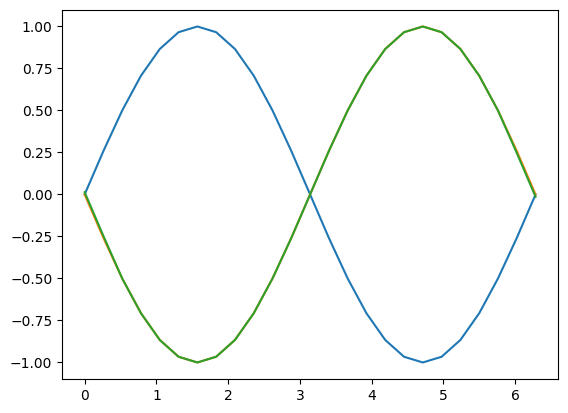

In [43]:
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)
plt.plot(x, y, x, -y, x, M.dot(y)/((x[1] - x[0])**2))